In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = '2.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [4]:
# 查看數據集的維度
df.shape

(830, 16)

In [5]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,股價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,5.87,39.85,8.38,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,6.29,44.05,27.37,0,1,1,1,1,1,5,1
2,1103,嘉泥,5.24,1.65,6.44,5.10,17.85,17.15,0,1,0,1,1,1,4,1
3,1104,環泥,6.66,1.82,14.24,4.79,21.70,24.16,0,1,0,0,1,1,3,-1
4,1108,幸福,1.71,0.21,8.77,5.47,10.60,3.95,0,1,0,1,1,0,3,-1


In [6]:
# 讓我們預覽數據集
col_names = df.columns
col_names

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股',
       'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test',
       '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [7]:
# 從列名中刪除前導空格
df.columns = df.columns.str.strip()
df.columns

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股',
       'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test',
       '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [8]:
# 檢查 All 列的分佈
df['正負樣本'].value_counts()

 1    447
-1    383
Name: 正負樣本, dtype: int64

In [9]:
# 查看 All 列的百分比分佈
df['正負樣本'].value_counts()/np.float(len(df))

 1    0.538554
-1    0.461446
Name: 正負樣本, dtype: float64

In [10]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          830 non-null    int64  
 1   股票          830 non-null    object 
 2   ROE_5Y      830 non-null    float64
 3   EPS_5Y      830 non-null    float64
 4   毛利率_5Y      830 non-null    float64
 5   現金殖利率       830 non-null    float64
 6   股價          830 non-null    float64
 7   董監持股        830 non-null    float64
 8   ROE_Test    830 non-null    int64  
 9   EPS_Test    830 non-null    int64  
 10  毛利率_Test    830 non-null    int64  
 11  現金殖利率_Test  830 non-null    int64  
 12  股價_Test     830 non-null    int64  
 13  董監持股_Test   830 non-null    int64  
 14  符合數量        830 non-null    int64  
 15  正負樣本        830 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 110.2+ KB


In [11]:
# 檢查變量中的缺失值
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
現金殖利率         0
股價            0
董監持股          0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
股價_Test       0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [12]:
# 查看數值變量中的匯總統計
round(df.describe(),2)

,代碼,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,股價_Test,董監持股_Test,符合數量,正負樣本
count,830.00,830.00,830.00,830.00,830.00,830.00,830.00,830.00,830.00,830.00,830.00,830.0,830.00,830.00,830.00
mean,3784.99,7.39,3.08,22.40,3.99,63.02,22.10,0.42,0.84,0.52,0.30,0.8,0.74,3.63,0.08
std,2338.99,14.95,4.46,17.68,2.76,106.78,16.58,0.49,0.36,0.50,0.46,0.4,0.44,1.19,1.00
min,1101.00,-215.93,-5.66,-113.93,0.00,1.13,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,-1.00
25%,2107.25,3.20,0.55,12.53,2.22,19.58,9.88,0.00,1.00,0.00,0.00,1.0,0.00,3.00,-1.00
50%,2910.50,8.37,1.84,20.74,3.69,33.22,17.41,0.00,1.00,1.00,0.00,1.0,1.00,4.00,1.00
75%,5266.25,14.12,4.24,30.44,5.40,67.95,30.13,1.00,1.00,1.00,1.00,1.0,1.00,4.00,1.00
max,9958.00,48.52,37.27,99.80,29.47,1650.00,90.70,1.00,1.00,1.00,1.00,1.0,1.00,6.00,1.00


Text(0, 0.5, '董監持股')

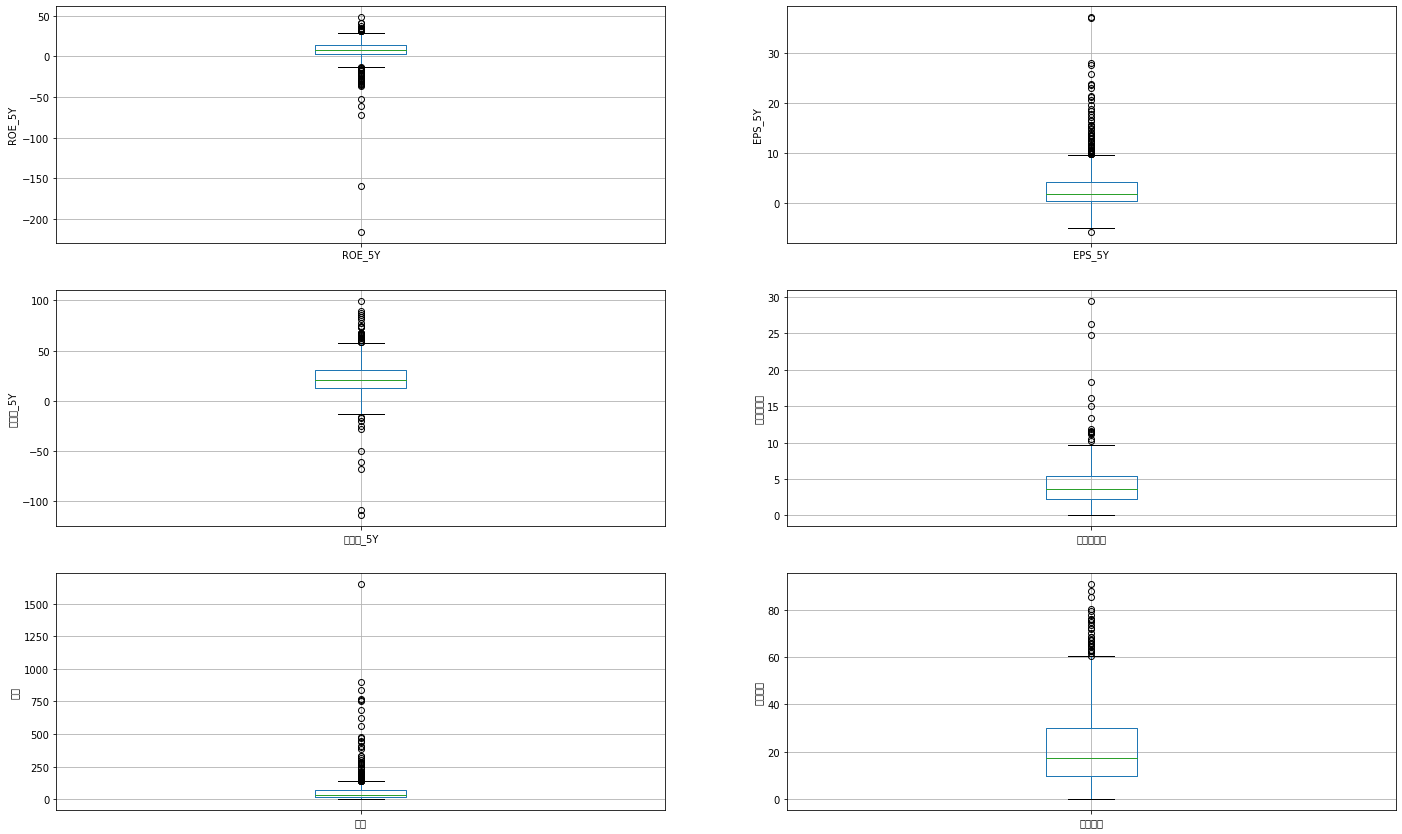

In [13]:
# 繪製箱線圖以可視化異常值
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='ROE_5Y')
fig.set_title('')
fig.set_ylabel('ROE_5Y')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='EPS_5Y')
fig.set_title('')
fig.set_ylabel('EPS_5Y')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='毛利率_5Y')
fig.set_title('')
fig.set_ylabel('毛利率_5Y')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='現金殖利率')
fig.set_title('')
fig.set_ylabel('現金殖利率')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='股價')
fig.set_title('')
fig.set_ylabel('股價')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='董監持股')
fig.set_title('')
fig.set_ylabel('董監持股')

Text(0, 0.5, 'Number of pulsar stars')

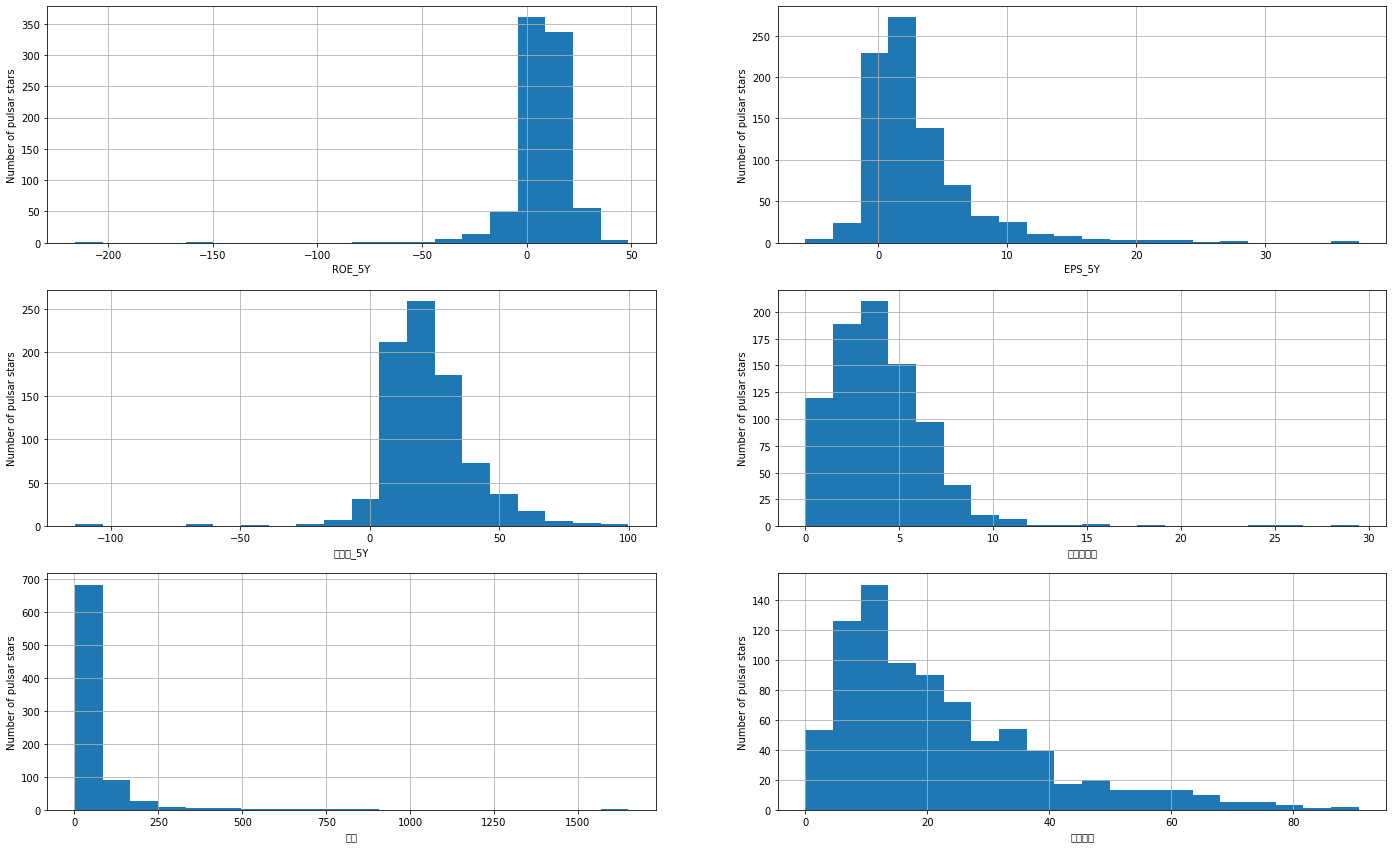

In [14]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['ROE_5Y'].hist(bins=20)
fig.set_xlabel('ROE_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['EPS_5Y'].hist(bins=20)
fig.set_xlabel('EPS_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['毛利率_5Y'].hist(bins=20)
fig.set_xlabel('毛利率_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['現金殖利率'].hist(bins=20)
fig.set_xlabel('現金殖利率')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['股價'].hist(bins=20)
fig.set_xlabel('股價')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['董監持股'].hist(bins=20)
fig.set_xlabel('董監持股')
fig.set_ylabel('Number of pulsar stars')

In [15]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [16]:
# 將 X 和 y 拆分為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
# 檢查 X_train 和 X_test 的形狀
X_train.shape, X_test.shape

((581, 6), (249, 6))

In [18]:
cols = X_train.columns

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [20]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [21]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [22]:
X_train.describe()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
count,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02,5.810000e+02
mean,4.280378e-17,8.255015e-17,1.528706e-16,-2.231911e-16,-1.070094e-17,1.681577e-17
std,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00,1.000862e+00
min,-1.382815e+01,-2.076535e+00,-7.525208e+00,-1.383487e+00,-5.761591e-01,-1.352640e+00
25%,-2.194168e-01,-5.826392e-01,-5.203709e-01,-6.228167e-01,-3.963693e-01,-7.465099e-01
50%,7.401127e-02,-2.857753e-01,-6.029214e-02,-1.191294e-01,-2.599736e-01,-2.694746e-01
75%,4.456041e-01,3.342870e-01,4.424686e-01,4.702190e-01,7.300638e-02,4.866511e-01
max,2.118702e+00,8.201179e+00,3.541071e+00,8.714244e+00,1.543086e+01,4.223018e+00


In [23]:
# 導入 SVC 分類器
from sklearn.svm import SVC


# 導入指標以計算準確性
from sklearn.metrics import accuracy_score


# 使用默認超參數實例化分類器
svc=SVC() 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8675


In [24]:
# 使用 rbf 內核和 C=100 實例化分類器
svc=SVC(C=100.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8554


In [25]:
# 使用 rbf 內核和 C=1000 實例化分類器
svc=SVC(C=1000.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8273


In [26]:
# 使用線性核和 C=1.0 實例化分類器
linear_svc=SVC(kernel='linear', C=1.0) 


# 將分類器擬合到訓練集
linear_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred_test=linear_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8474


In [27]:
# 使用線性核和 C=100.0 實例化分類器
linear_svc100=SVC(kernel='linear', C=100.0) 


# 將分類器擬合到訓練集
linear_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8434


In [28]:
# 用線性核和 C=1000.0 實例化分類器
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# 將分類器擬合到訓練集
linear_svc1000.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc1000.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.8434


In [29]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([ 1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
        1, -1, -1,  1, -1

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))S

Training-set accuracy score: 0.8227


In [31]:
# 打印訓練和測試集的分數

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8227
Test set score: 0.8474


In [32]:
# 檢查測試集中的類分佈
y_test.value_counts()

 1    132
-1    117
Name: 正負樣本, dtype: int64

In [33]:
# 檢查空準確度分數

null_accuracy = (132/(132+117))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5301


In [34]:
# 使用多項式內核和 C=1.0 實例化分類器
poly_svc=SVC(kernel='poly', C=1.0) 


# 將分類器擬合到訓練集
poly_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=poly_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7590


In [35]:
# 使用多項式內核和 C=100.0 實例化分類器
poly_svc100=SVC(kernel='poly', C=100.0) 


# 將分類器擬合到訓練集
poly_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=poly_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8514


In [36]:
# 使用 sigmoid 內核和 C=1.0 實例化分類器
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# 將分類器擬合到訓練集
sigmoid_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7229


In [37]:
# 使用 sigmoid 內核和 C=100.0 實例化分類器
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# 將分類器擬合到訓練集
sigmoid_svc100.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.7349


In [38]:
# 打印混淆矩陣並將其切成四塊

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 93  24]
 [ 14 118]]

True Positives(TP) =  93

True Negatives(TN) =  118

False Positives(FP) =  24

False Negatives(FN) =  14


<AxesSubplot:>

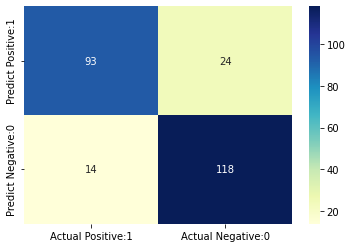

In [39]:
# 使用 seaborn 熱圖可視化混淆矩陣

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.87      0.79      0.83       117
           1       0.83      0.89      0.86       132

    accuracy                           0.85       249
   macro avg       0.85      0.84      0.85       249
weighted avg       0.85      0.85      0.85       249



In [41]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [42]:
# 打印分類精度

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8474


In [43]:
# 打印分類錯誤

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1526


In [44]:
# 打印精度分數

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7949


In [45]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8692


In [46]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8692


In [47]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1690


In [48]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8310


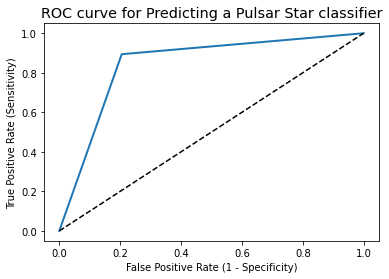

In [49]:
# 繪製 ROC 曲線

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()